In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cluster import MiniBatchKMeans

In [158]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

# Task 1

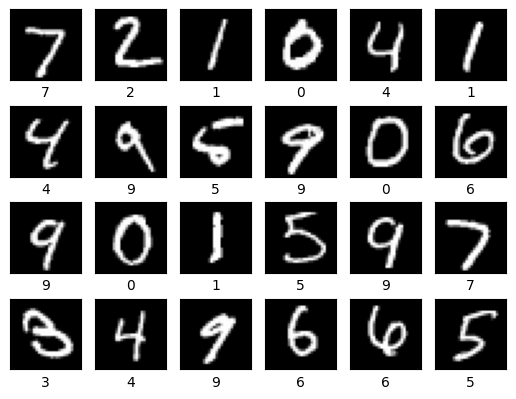

In [159]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

1. Кластеризация методом K-means

При помощи train_test_split() разбейте набор данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=35. Раз речь идет об известном наборе данных, заставим K-means искать  групп объектов. «Распрямите» изображения и обучите модель KMeans() на тренировочном наборе данных со следующими параметрами: random_state=35, n_clusters=10.

Определите чило элементов, отнесенных к кластеру, с меткой 6.

In [160]:
X.shape

(10000, 28, 28)

In [161]:

X = X.reshape(-1,784)
X.shape

(10000, 784)

In [162]:
random_state = 21

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=random_state)

In [164]:
X_train = [x.flatten() for x in X_train]

In [165]:
X_test = [x.flatten() for x in X_test]

In [166]:
len(X_train)

8000

In [167]:
kmeans = KMeans(n_clusters = 10, random_state=random_state)
kmeans.fit(X_train)
clustered = kmeans.predict(X_train)

In [168]:
df_train = pd.DataFrame(X_train)
df_train['cluster'] = clustered
df_train['y'] = y_train

In [169]:
df_train.groupby('cluster')[0].count()

cluster
0     634
1     735
2     699
3     612
4     932
5    1003
6    1007
7     778
8     889
9     711
Name: 0, dtype: int64

In [170]:
cluster_centers = [c.reshape(28, 28) for c in kmeans.cluster_centers_]

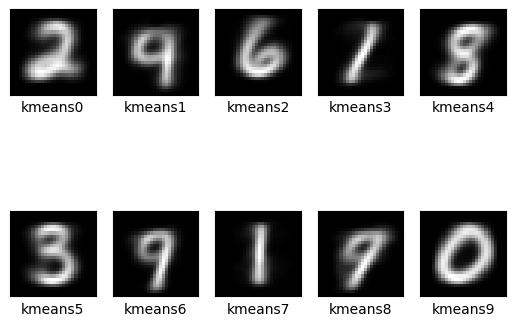

In [171]:
fig, ax = plt.subplots(2, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(cluster_centers[i], cmap='gray')
  axi.set(xticks=[], yticks=[])
  axi.set_xlabel(kmeans.get_feature_names_out()[i],
                color='black')

Введите через запятую и пробел полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [172]:
table_of_clusters = df_train.groupby(['cluster', 'y'])['y'].count()

In [173]:
new_clusters = [table_of_clusters[x].index[table_of_clusters[x].argmax()] for x in range(0, 10)]

In [174]:
new_clusters

[2, 4, 6, 1, 8, 3, 7, 1, 7, 0]

In [175]:
d = dict(zip(range(10), new_clusters))

Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Рекомендуем использовать функцию accuracy_score из библиотеки sklearn.

Вычислите accuracy для тренировочного набора данных.

In [176]:
df_train['new_clusters'] = df_train['cluster'].map(d)

In [177]:
df_train = df_train.drop('cluster', axis=1)

In [178]:
accuracy_score(df_train['y'], df_train['new_clusters'])

0.589875

In [68]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,y,new_clusters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,9


При помощи метода .predict() произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [179]:
predictions = kmeans.predict(X_test)

In [180]:
predictions = pd.Series(predictions).map(d)

In [181]:
accuracy_score(y_test, predictions)

0.593

In [182]:
df_test = pd.DataFrame(X_test)
df_test['y'] = y_test
df_test['new_cluster'] = predictions

Постройте матрицу ошибок.

С какой цифрой построенная модель чаще всего путала цифру  на тестовых данных?

In [184]:
df_test.groupby(['y', 'new_cluster'])['y'].count()[9]

new_cluster
1      2
3      2
4     56
7    135
8      3
Name: y, dtype: int64

2. Кластеризация с предварительным снижением размерности.

Преобразуйте тренировочный набор данных при помощи метода TSNE из библиотеки sklearn со следующими параметрами: n_components=2, init='random', random_state=35

Произведите кластеризацию полученного набора данных при помощи KMeans со следующими параметрами: n_clusters=10, random_state=35. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера.

Оцените точность модели на тренировочных данных.

In [185]:
X_train = pd.DataFrame(X_train)

In [186]:
from sklearn.manifold import TSNE

In [187]:
tsne = TSNE(n_components=2, init='random', random_state=random_state)
df_train_tsne = tsne.fit_transform(X_train)

In [188]:
df_train_tsne = pd.DataFrame(df_train_tsne)

In [189]:
clustered = pd.Series(kmeans.fit_predict(df_train_tsne))

In [190]:
clustered

0       1
1       2
2       9
3       1
4       0
       ..
7995    9
7996    5
7997    7
7998    6
7999    9
Length: 8000, dtype: int32

In [191]:
df_train_tsne['cluster'] = clustered
df_train_tsne['y'] = y_train

In [192]:
table_of_clusters = df_train_tsne.groupby(['cluster', 'y'])['y'].count()

In [193]:
table_of_clusters

cluster  y
0        0      1
         2     16
         3      7
         4      1
         7    721
             ... 
9        5     13
         6      5
         7     31
         8      9
         9      7
Name: y, Length: 74, dtype: int64

In [194]:
new_clusters = [table_of_clusters[i].index[table_of_clusters[i].argmax()] for i in range(10)]
new_clusters

[7, 3, 0, 8, 6, 4, 2, 5, 9, 1]

In [195]:
d = dict(zip(range(10), new_clusters))
d

{0: 7, 1: 3, 2: 0, 3: 8, 4: 6, 5: 4, 6: 2, 7: 5, 8: 9, 9: 1}

In [196]:
df_train_tsne['new_clusters'] = pd.Series(clustered).map(d)

In [197]:
df_train_tsne

,0,1,cluster,y,new_clusters
0,25.221298,59.443153,1,3,3
1,51.862324,11.315756,2,0,0
2,-40.958210,5.215942,9,5,1
3,10.709620,35.946693,1,3,3
4,-51.459476,-32.586147,0,7,7
...,...,...,...,...,...
7995,-62.025681,3.055197,9,1,1
7996,6.026309,-66.070084,5,4,4
7997,12.059240,-6.998291,7,5,5
7998,-4.865970,50.905891,6,2,2


In [198]:
accuracy_score(y_train, df_train_tsne['new_clusters'])

0.8235

# Task 2

Вычислите среднее значение интенсивности пикселей по всем каналам.

In [200]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


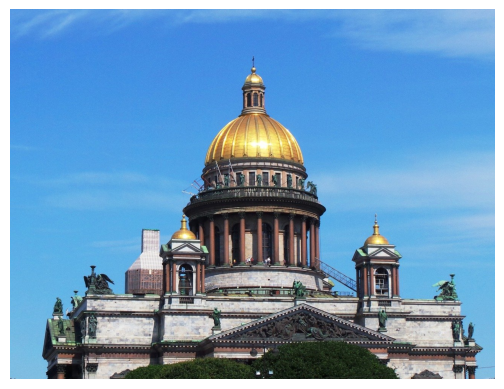

In [203]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


# Путь к изображению
img_path = '/content/drive/MyDrive/projects/data/spb_st_isaacs_2.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

In [204]:
img.mean()

140.9997785391052

Нормируйте значения интенсивностей пикселей, разделив все значения на 255.

Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [205]:
img = img/255

In [206]:
img.mean()

0.552940307996491

In [207]:
def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [208]:
img = img.reshape(-1, 3)

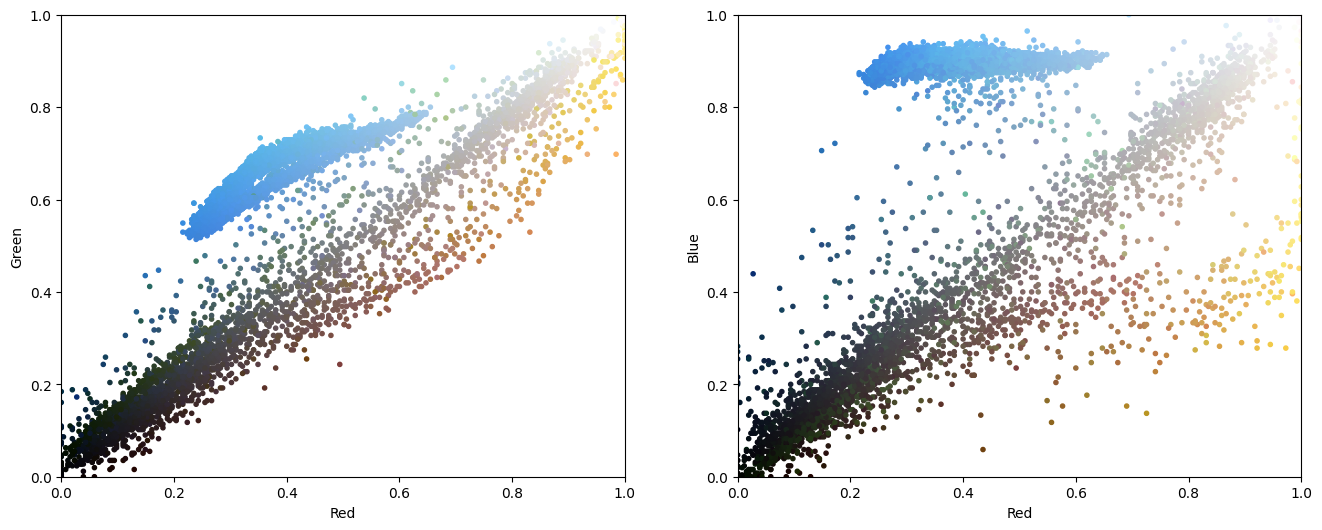

In [209]:
plot_pixels(img)

In [210]:
random_state = 10

In [211]:
model = MiniBatchKMeans(n_clusters=16, random_state=10)
model.fit(img)

MiniBatchKMeans(n_clusters=16, random_state=10)

In [212]:
clusters = model.predict(img)

In [213]:
cluster_centers = model.cluster_centers_

In [214]:
df = pd.DataFrame(img)

In [215]:
df['cluster'] = clusters
df

,0,1,2,cluster
0,0.341176,0.603922,0.882353,2
1,0.337255,0.600000,0.878431,2
2,0.333333,0.596078,0.874510,2
3,0.337255,0.600000,0.878431,2
4,0.349020,0.607843,0.898039,2
...,...,...,...,...
1249275,0.521569,0.639216,0.741176,3
1249276,0.419608,0.521569,0.627451,14
1249277,0.333333,0.415686,0.521569,14
1249278,0.423529,0.501961,0.600000,14


In [216]:
d = dict(zip(range(16), cluster_centers))
d

{0: array([0.8790297 , 0.87073241, 0.84908449]),
 1: array([0.25728459, 0.25399578, 0.26046403]),
 2: array([0.3228856 , 0.63296544, 0.89963994]),
 3: array([0.61162465, 0.60230314, 0.59341737]),
 4: array([0.0875129 , 0.0988006 , 0.08933379]),
 5: array([0.56345098, 0.75060317, 0.9003324 ]),
 6: array([0.38725991, 0.6889067 , 0.89933527]),
 7: array([0.27269568, 0.57221959, 0.88669871]),
 8: array([0.75878788, 0.74624678, 0.73107546]),
 9: array([0.3224736 , 0.34031084, 0.35656109]),
 10: array([0.92380461, 0.80519436, 0.45627795]),
 11: array([0.17015094, 0.1801721 , 0.18337142]),
 12: array([0.45227322, 0.34817927, 0.31064426]),
 13: array([0.65481624, 0.48306011, 0.3583628 ]),
 14: array([0.43222898, 0.4564796 , 0.46152806]),
 15: array([0.46277372, 0.71780092, 0.89619651])}

In [217]:
df_new = df['cluster'].map(d)

In [218]:
df_new.mean().mean()

0.5538263185044023

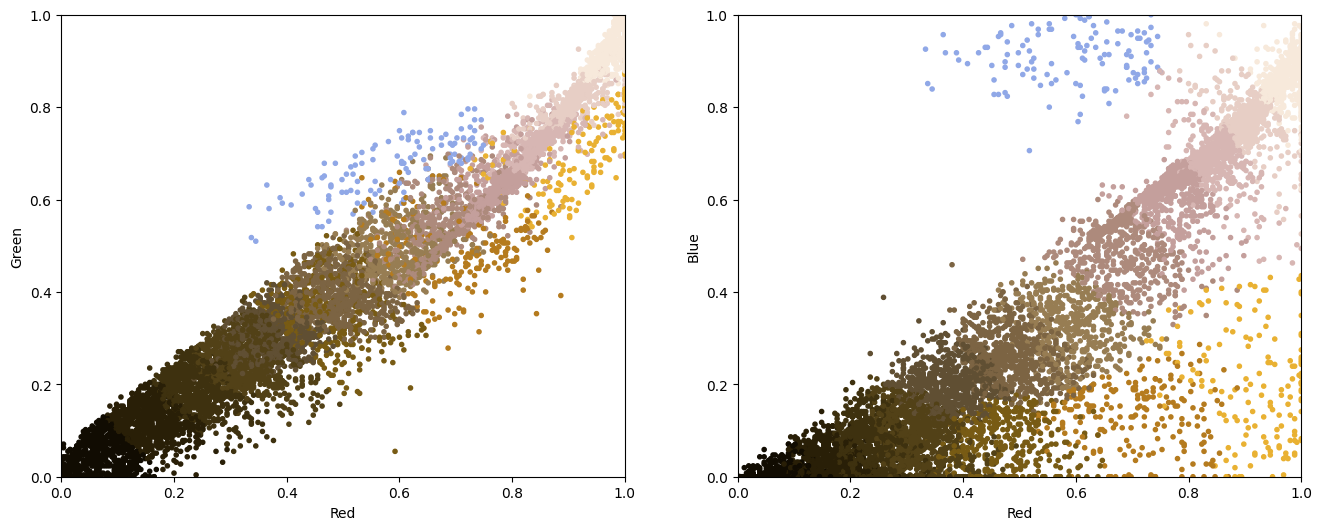

In [127]:
plot_pixels(img, colors=df_new)

Постройте изображение размера  на основе полученных  цветов. Выберите верное изображение.

In [128]:
pixels_np = np.array(cluster_centers)
palette = pixels_np.reshape(4, 4, 3)

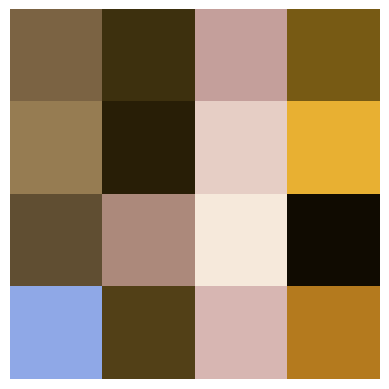

In [129]:
plt.imshow(palette)
plt.axis('off')
plt.show()

# Task 3

In [219]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.data.shape

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

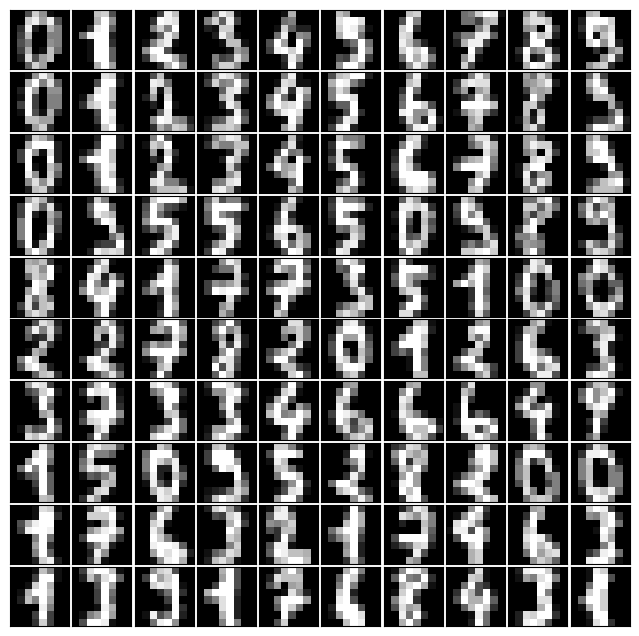

In [220]:
fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits.data[i].reshape(8,8), cmap='gray')
    im.set_clim(0, 16)

In [221]:
pca = PCA(n_components=0.99, svd_solver='full')
data = pca.fit_transform(digits.data)

In [222]:
data.shape

(1797, 41)

Обучим интересующую нас модель, подобрав гиперпараметр, отвечающий за число используемых компонент, минимизируя информационный критерий Акаике.

Для значений параметра n_components в диапазоне  с шагом  обучите модели GaussianMixture со следующими параметрами: covariance_type='full', random_state=7. При помощи метода .aic() вычислите значение критерия каждой модели.

Введите значение n_components модели с наименьшим значением критерия Акаике.

In [136]:
random_state = 11

In [137]:
history = []

In [138]:
for n in range(50, 250, 10):
  gm = GaussianMixture(n_components=n, covariance_type='full', random_state=random_state)
  gm.fit(data)
  history.append([n, gm.aic(data)])

In [139]:
pd.DataFrame(history)

,0,1
0,50,182557.339048
1,60,108399.294095
2,70,34585.301930
3,80,-15163.839855
4,90,-66676.198100
5,100,-105613.351845
6,110,-125937.675231
7,120,-152595.021085
8,130,-169840.874103
9,140,-172432.534370


Введите значение n_components модели с наименьшим значением критерия Акаике.

In [140]:
n_comp_optimal = pd.DataFrame(history)[0][pd.DataFrame(history)[1].argmin()]
n_comp_optimal

180

Обучите финальную модель на подобранном гиперпараметре. Проверьте, что обучение сошлось (поле .converged_ модели). При помощи метода .sample(100) сгенерируйте  новых объектов.

Введите выборочное среднее коориднаты с индексом  сгенерированных объектов.

In [141]:
gm = GaussianMixture(n_components=n_comp_optimal, covariance_type='full', random_state=random_state)
gm.fit(data)

GaussianMixture(n_components=180, random_state=11)

In [142]:
gm.converged_

True

In [143]:
samples_generated = gm.sample(100)

In [149]:
samples_df = pd.DataFrame(samples_generated[0])

Введите выборочное среднее коориднаты с индексом  сгенерированных объектов.

In [145]:
samples_df[0].mean()

-1.1059140036175215

При помоши метода .inverse_transform() класса PCA верните сгенерированные объекты в пространство исходных признаков. Визуализируйте полученные результаты.

In [151]:
inverse_samples = pca.inverse_transform(samples_df)

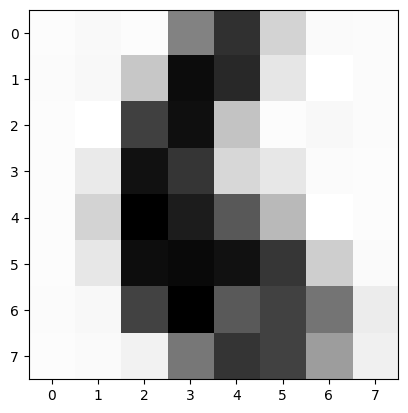

In [153]:
plt.imshow(inverse_samples[17].reshape(8, 8), cmap='binary')